In [27]:
import pandas as pd

In [28]:
dataframe_comentarios = pd.read_csv('Dados Finais/AngularJS-Comentarios.csv', sep = ';')
dataframe_issues = pd.read_excel('Dados Finais/AngularJS-ISSUES.xlsx')

In [29]:
dataframe_comentarios

,ID_ISSUE,ID_USUARIO_COMENTARIO,DATA_REGISTRO
0,1179952051,55858104,24/03/2022
1,1175366700,8604205,21/03/2022
2,1158435035,55858104,03/03/2022
3,1145669166,1758366,21/02/2022
4,1145669166,23275040,21/02/2022
...,...,...,...
80206,316368,216296,28/09/2010
80207,316289,111951,14/09/2010
80208,316289,111951,14/09/2010
80209,307811,111951,14/09/2010


In [30]:
dataframe_issues

,Unnamed: 0,ID_ISSUE,TITULO ISSUE,DATA_CRIAÇÃO,DATA_FINALIZAÇÃO,ID_AUTOR,PULL_REQUEST,NUMBER_ISSUE
0,0,1185843130,[],30/03/2022,30/03/2022,102326374,Falso,17186
1,1,1179952051,[],24/03/2022,25/03/2022,98991123,Verdadeiro,17185
2,2,1175366700,AngularJs 1.7.0 Upgrade Issue.,21/03/2022,21/03/2022,102037462,Falso,17184
3,3,1167305397,what correct typing for $sanitize?,12/03/2022,12/03/2022,74149517,Falso,17183
4,4,1158435035,V1.7.x,03/03/2022,03/03/2022,11400029,Verdadeiro,17182
...,...,...,...,...,...,...,...,...
17034,1034,317758,This patch makes including angular.js with que...,15/09/2010,15/09/2010,265981,Verdadeiro,5
17035,1035,316368,rewrite $sessionStore for better compression,14/09/2010,29/09/2010,111951,Falso,4
17036,1036,316289,Lint fixes,14/09/2010,14/09/2010,216296,Verdadeiro,3
17037,1037,307811,JSLint fixes,08/09/2010,14/09/2010,216296,Verdadeiro,2


In [250]:
from datetime import datetime

lista_relacionamentos = dict()
limite_inferior = '01/01/2020'
limite_superior = '01/01/2021'

limite_inferior = datetime.strptime(limite_inferior, "%d/%m/%Y")
limite_superior = datetime.strptime(limite_superior, "%d/%m/%Y")

for issue in dataframe_issues.values:
    
    data_criacao = datetime.strptime(issue[3], "%d/%m/%Y")

    if data_criacao < limite_inferior or data_criacao >= limite_superior:
        pass
    
    else:
        id_issue = issue[1]
        participantes_issue = [issue[5]]

        for comentario in dataframe_comentarios[dataframe_comentarios.ID_ISSUE == id_issue].values:
            
            id_usuario = comentario[1]

            for id_usuario_anterior in participantes_issue:
                if id_usuario > id_usuario_anterior:
                    key = "{}/{}".format(id_usuario, id_usuario_anterior)
                elif id_usuario < id_usuario_anterior:
                    key = "{}/{}".format(id_usuario_anterior, id_usuario)
                else:
                    key = None

                if key in lista_relacionamentos.keys():
                    lista_relacionamentos[key] = lista_relacionamentos[key] + 1
                elif key != None:
                    lista_relacionamentos[key] = 1
                    
            participantes_issue.append(id_usuario)

In [251]:
lista_relacao = list()
desenvolvedores = []

for linha in lista_relacionamentos.items():
    autor1, autor2 = linha[0].split("/")

    if autor1 not in desenvolvedores:
        desenvolvedores.append(autor1)
    if autor2 not in desenvolvedores: 
        desenvolvedores.append(autor2)

    intensidade = linha[1]

    lista_relacao.append({
        'From': autor1,
        'To': autor2,
        'Strength': intensidade
    })

relacoes = pd.DataFrame(lista_relacao)
relacoes.to_csv('Teste.csv', sep = ",")

In [252]:
import networkx as nx

import PIL
imagem = PIL.Image.open('Imagens/UsuarioColorido.jpg')

G = nx.Graph()
for no in desenvolvedores:
    G.add_node(no, image = imagem, label = no)

for linha in lista_relacao:
    G.add_edge(
        linha['From'], 
        linha['To'], 
        weigth = linha['Strength']
        )

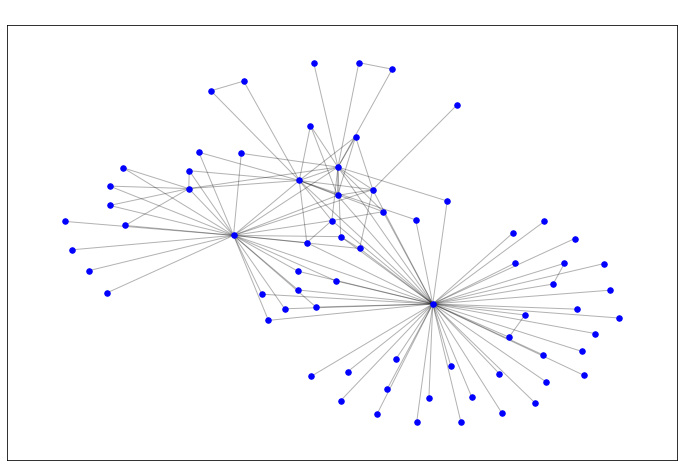

In [253]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(1, figsize=(12, 8))

pos = nx.fruchterman_reingold_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size = 30, node_color = 'blue')
nx.draw_networkx_edges(G, pos, alpha = 0.3)

plt.title('Egonet - Neylson', size = 16, fontdict = {'color': 'white'})

plt.show() 

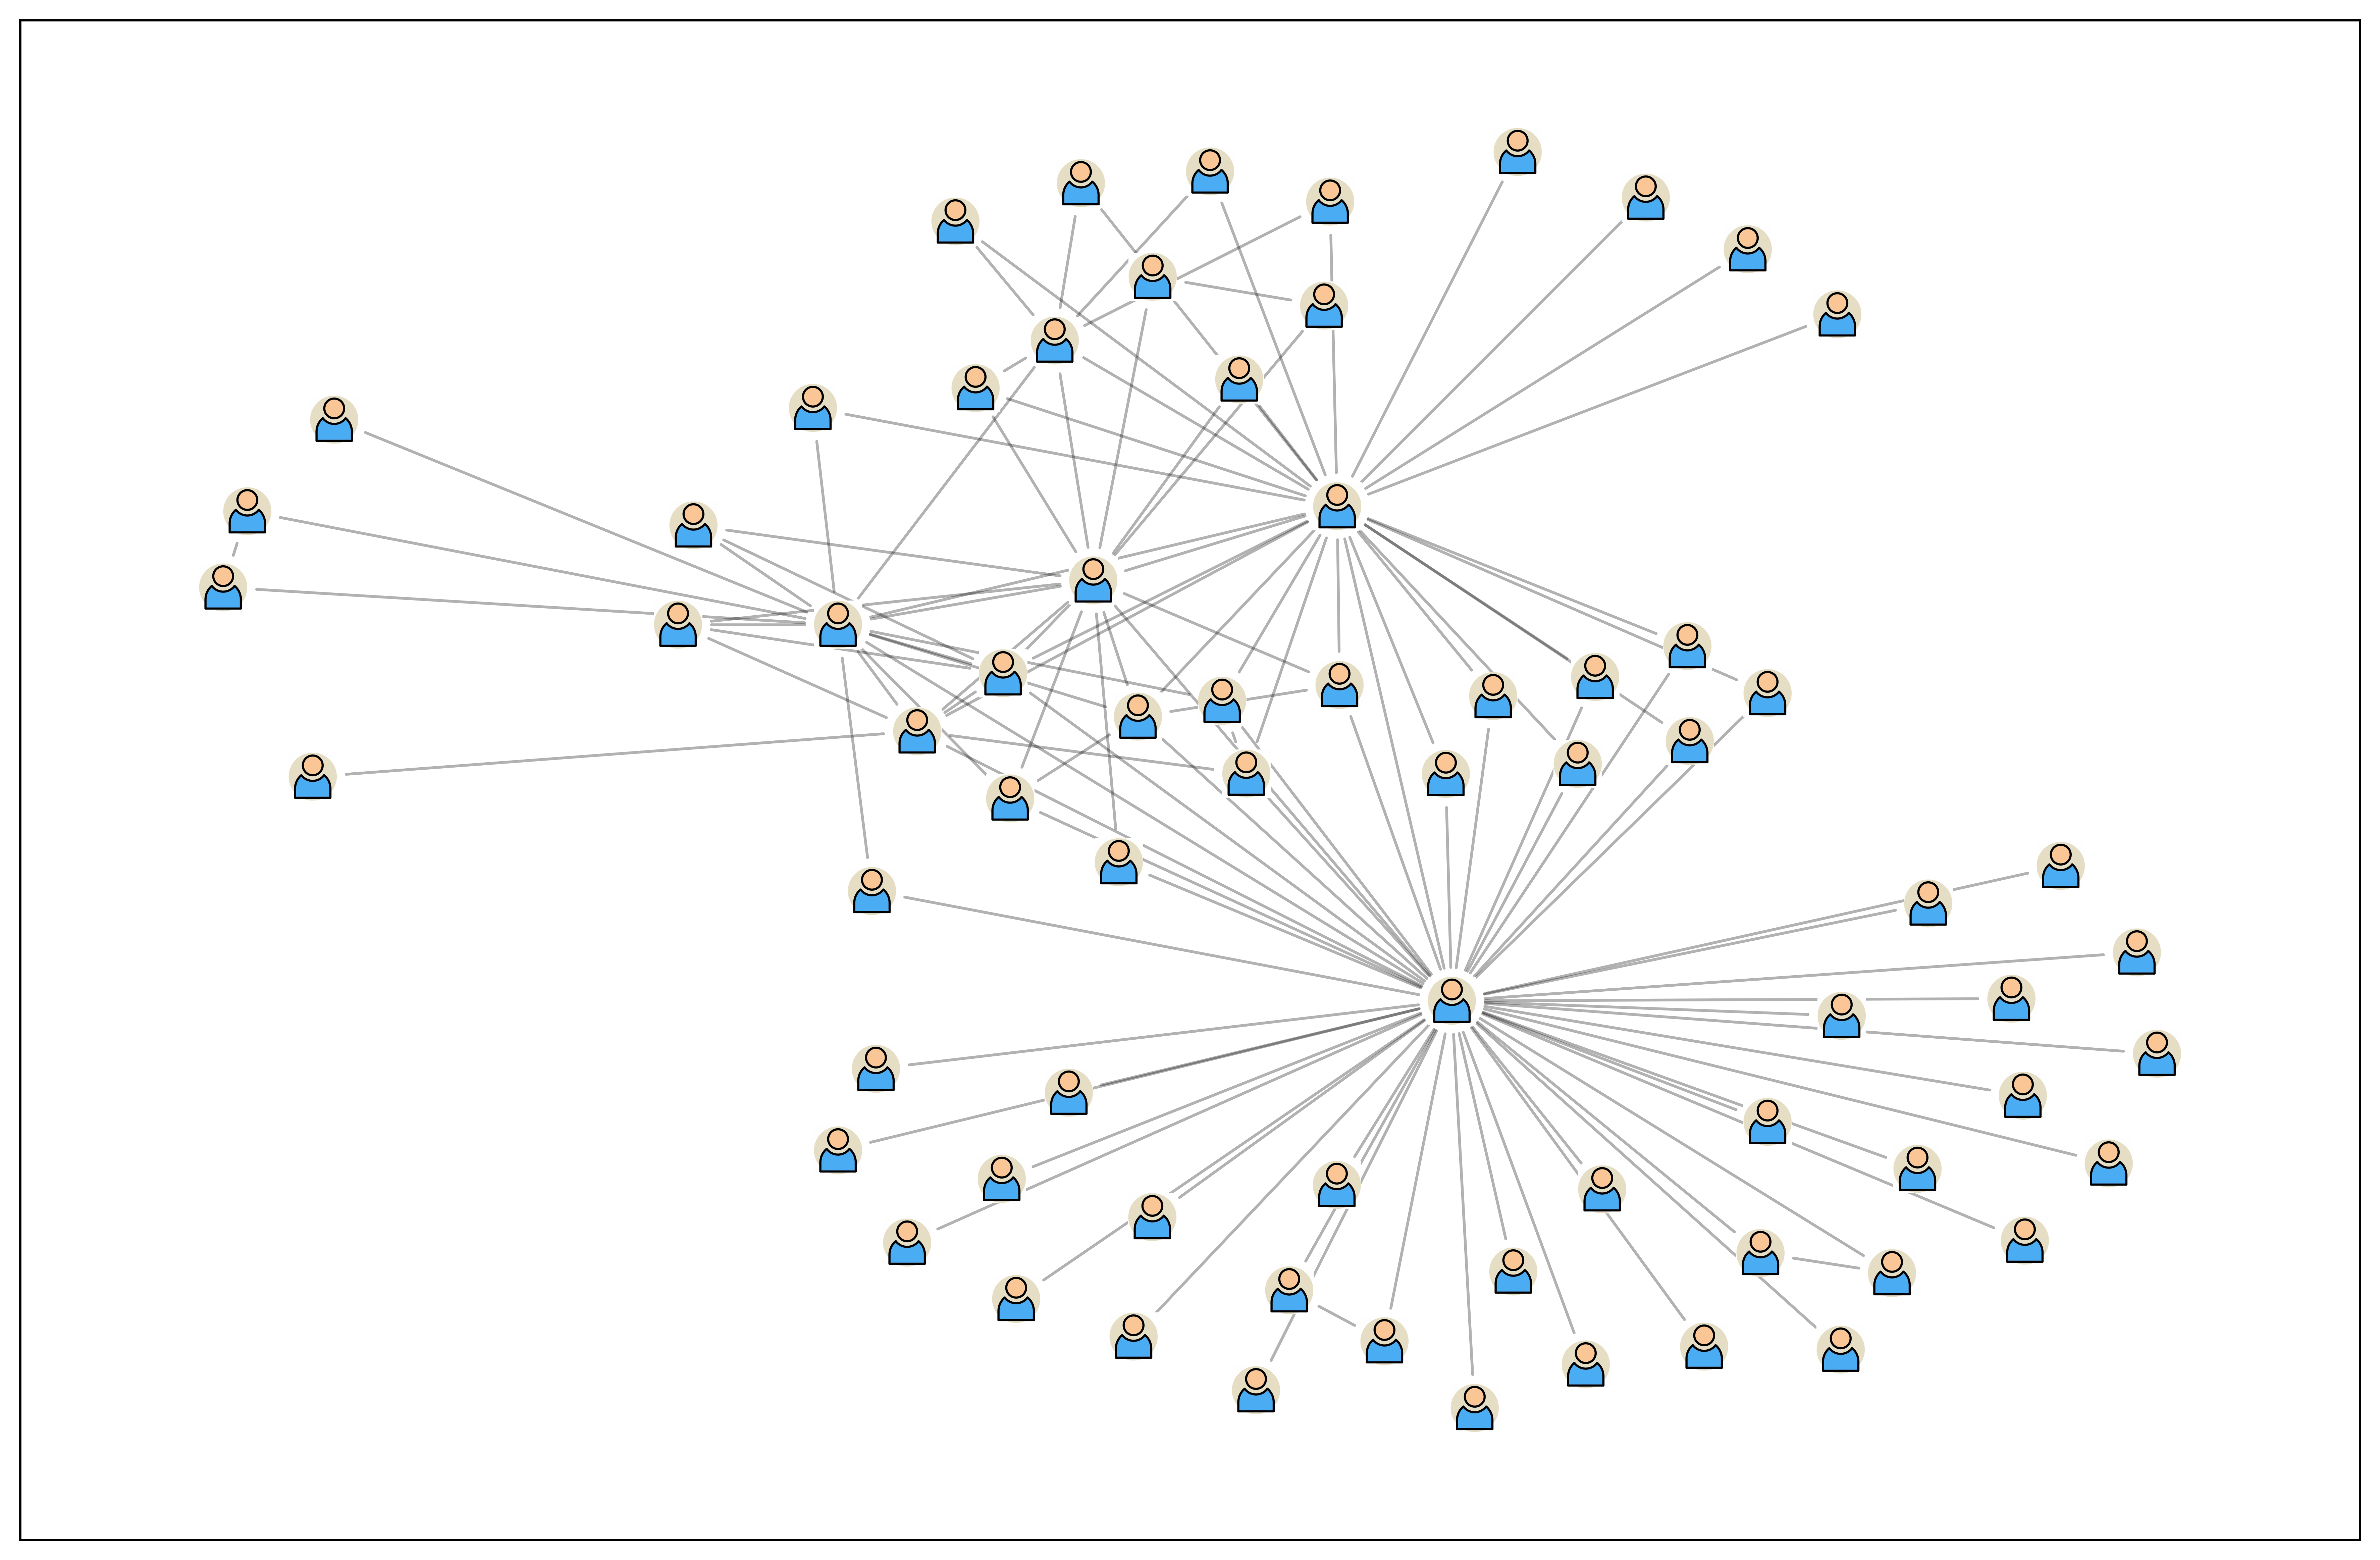

In [254]:
pos = nx.fruchterman_reingold_layout(
    G, 
    seed = 11, 
    iterations = 111
    )

fig, ax = plt.subplots(dpi = 600)

fig.set_figheight(10)
fig.set_figwidth(15)

nx.draw_networkx_edges(
    G,
    pos = pos,
    ax = ax,
    arrows = True,
    arrowstyle = "-",
    min_source_margin = 12,
    min_target_margin = 12,
    alpha = 0.3,
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.0125
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")


plt.show()

In [276]:
list(G.degree())

[('3506071', 16),
 ('725445', 2),
 ('8604205', 50),
 ('17308882', 1),
 ('12199478', 1),
 ('73164470', 2),
 ('6369589', 2),
 ('1758366', 8),
 ('72785951', 1),
 ('5110512', 1),
 ('20567197', 1),
 ('55858104', 2),
 ('16708391', 2),
 ('3316116', 1),
 ('56343352', 2),
 ('5384588', 28),
 ('72143828', 2),
 ('10864441', 8),
 ('10137', 2),
 ('25745900', 2),
 ('72174715', 2),
 ('67471383', 3),
 ('15655', 16),
 ('49699333', 4),
 ('43973132', 2),
 ('18549378', 1),
 ('69984916', 2),
 ('18679302', 1),
 ('12045773', 4),
 ('17544636', 6),
 ('25517620', 4),
 ('39180378', 1),
 ('26227525', 1),
 ('16761934', 1),
 ('64889341', 2),
 ('216296', 2),
 ('11247612', 2),
 ('4944657', 2),
 ('61279198', 1),
 ('61864865', 1),
 ('32306920', 1),
 ('8888278', 2),
 ('3868618', 2),
 ('128171', 7),
 ('15815884', 4),
 ('49538279', 4),
 ('51971807', 1),
 ('1781172', 3),
 ('36989112', 1),
 ('14882104', 1),
 ('17746484', 1),
 ('17654780', 2),
 ('5107798', 2),
 ('12371363', 1),
 ('1305871', 1),
 ('61813399', 1),
 ('50907236',

In [260]:
list(G.adjacency())

[('3506071',
  {'725445': {'weigth': 1},
   '8604205': {'weigth': 18},
   '73164470': {'weigth': 1},
   '6369589': {'weigth': 1},
   '67471383': {'weigth': 1},
   '5384588': {'weigth': 5},
   '10864441': {'weigth': 1},
   '43973132': {'weigth': 3},
   '12045773': {'weigth': 8},
   '17544636': {'weigth': 8},
   '15655': {'weigth': 5},
   '25517620': {'weigth': 1},
   '1758366': {'weigth': 13},
   '128171': {'weigth': 5},
   '15815884': {'weigth': 1},
   '1781172': {'weigth': 4}}),
 ('725445', {'3506071': {'weigth': 1}, '8604205': {'weigth': 1}}),
 ('8604205',
  {'725445': {'weigth': 1},
   '3506071': {'weigth': 18},
   '17308882': {'weigth': 1},
   '12199478': {'weigth': 1},
   '1758366': {'weigth': 3},
   '72785951': {'weigth': 1},
   '20567197': {'weigth': 2},
   '16708391': {'weigth': 2},
   '55858104': {'weigth': 1},
   '3316116': {'weigth': 1},
   '56343352': {'weigth': 4},
   '5384588': {'weigth': 46},
   '49699333': {'weigth': 9},
   '15655': {'weigth': 12},
   '18549378': {'weig

In [34]:
from datetime import datetime

lista_relacionamentos = dict()
limite_inferior = '01/01/2020'
limite_superior = '01/01/2021'

limite_inferior = datetime.strptime(limite_inferior, "%d/%m/%Y")
limite_superior = datetime.strptime(limite_superior, "%d/%m/%Y")

for issue in dataframe_issues.values:
    
    data_criacao = datetime.strptime(issue[3], "%d/%m/%Y")

    if data_criacao < limite_inferior or data_criacao >= limite_superior:
        pass
    
    else:
        id_issue = issue[1]
        participantes_issue = [issue[5]]

        for comentario in dataframe_comentarios[dataframe_comentarios.ID_ISSUE == id_issue].values:
            
            id_usuario = comentario[1]

            for id_usuario_anterior in participantes_issue:
                if id_usuario > id_usuario_anterior:
                    key = "{}/{}".format(id_usuario, id_usuario_anterior)
                elif id_usuario < id_usuario_anterior:
                    key = "{}/{}".format(id_usuario_anterior, id_usuario)
                else:
                    key = None

                is_issue = 0
                is_pull = 0

                if issue[6] == 'Verdadeiro':
                    is_issue = 1
                else:
                    is_pull = 1

                if key in lista_relacionamentos.keys():
                    lista_relacionamentos[key] = [
                        lista_relacionamentos[key][0] + is_issue,
                        lista_relacionamentos[key][1] + is_pull,
                        ]

                elif key != None:
                    lista_relacionamentos[key] = [
                        is_issue,
                        is_pull,
                    ]
                    
            participantes_issue.append(id_usuario)

In [41]:
relacionamento_issues = 0
relacionamento_pull = 0
relacionamento_misto = 0

for value in lista_relacionamentos.items():
    if value[1][0] == 0 and value[1][1] != 0:
        relacionamento_issues = relacionamento_issues + 1

    elif value[1][0] != 0 and value[1][1] == 0:
        relacionamento_pull = relacionamento_pull + 1

    else:
        relacionamento_misto = relacionamento_misto + 1

In [ ]:
# import modules
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt

figure = plt.figure(
    figsize = (12, 8), 
    facecolor = 'white',
    dpi = 300
    )

# depict venn diagram
venn2(
    subsets = (relacionamento_issues, relacionamento_pull, relacionamento_misto), 
    set_labels = ('Issues', 'Pull Request'),
    set_colors = ("orange", "blue"), 
    alpha = 0.7
    )

plt.title('Relacionamento entre Desenvolvedores Angular.js - 2020-2021', size = 16, fontdict = {'color': 'black'})
plt.savefig('Imagens/DiagramaVenn Angular.js - 2020-2021.png')
plt.show()